# Python Essentials  



## 1. Why Python?  

Python is a [high-level language](https://en.wikipedia.org/wiki/High-level_programming_language) (as MATLAB or R) that is known to be a glue language because it can easily interact with other programming languages and their libraries (e.g., C, C++ or Fortran).  

### Strengths  

- There is a rich collection of existing libraries of classic numerical methods, plotting or data processing tools. We don’t need to reinvent the wheel and re-program a numerical integration for example, we can stand on the shoulders of giants!
- Several Integrated Development Environment (IDE) options: IPython, Spyder, Jupyter notebooks, Pycharm, Visual Studio Code...
- It is easy and fun to use! The Python ecosystem is huge and the community is very friendly.  
- It has a clean sytanx: "We code what we think"
- It is open-source and free! (not MATLAB).


### Cons  

- Since Python is an interpreted language (not a compiled one), the main criticism is its speed. However, most speed issues can be balanced out by using appropriate data structures and algorithms.  

## 2. As researchers we need...  

- Get, organise and/or model data.  
- Manipulate and process data.
- Visualise data.

### Python core libraries for getting things done  

- [Numpy](https://numpy.org/doc/stable/user/absolute_beginners.html) for numerical computing of arrays.
- [Scipy](https://docs.scipy.org/doc/scipy/tutorial/index.html#user-guide) for high-level routines as optimisation, interpolation, integration, differential equations, signal processing, etc.  
- [matplotlib](https://matplotlib.org/stable/gallery/index.html) for 2D visualisation.  

### A quick example  

Let's generate a time-domain periodic function with frequency = 4 Hz (using numpy):

$$
\sin 2\pi f t.
$$  

We will compute then the Discrete Fourier Transform (scipy) and plot the wave and its corresponding frequency spectrum.

In [ ]:
import numpy as np  
from matplotlib import pyplot as plt

#Frequency in terms of Hertz
freq  = 4 
#Sample rate
freq_samp = 20
t = np.linspace(0, 1, 2 * freq_samp, endpoint = False ) # here we are using numpy (as np)
a = np.sin(freq  * 2 * np.pi * t)
figure, axis = plt.subplots() # here we are using matplotlib pyplot (as plt)
axis.plot(t, a)
axis.plot(t, a, 'o')
axis.set_xlabel ('Time (s)')
axis.set_ylabel ('Signal amplitude')

print('t =', t)
print('a =', a)
plt.show()

C:\Users\s3761375\AppData\Local\anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  import sys


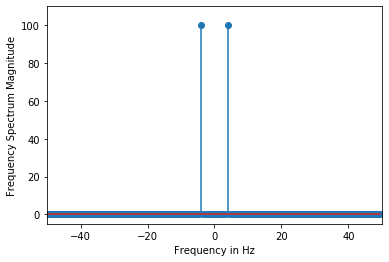

In [8]:
from scipy import fftpack

A = fftpack.fft(a) # here we are using scipy
frequency = fftpack.fftfreq(len(a)) * freq_samp
figure, axis = plt.subplots()

axis.stem(frequency, np.abs(A))
axis.set_xlabel('Frequency in Hz')
axis.set_ylabel('Frequency Spectrum Magnitude')
axis.set_xlim(-freq_samp / 2, freq_samp/ 2)
axis.set_ylim(-5, 110)
plt.show()

### Other packages... more specific

- [Mayavi](http://scipy-lectures.org/packages/3d_plotting/index.html#mayavi-label) for 3D visualisation.
- [pandas, statsmodels, seaborn](http://scipy-lectures.org/packages/statistics/index.html#statistics) for statistics.
- [sympy](http://scipy-lectures.org/packages/sympy.html#sympy) for symbolic computing.
- [scikit-learn](http://scipy-lectures.org/packages/scikit-learn/index.html#scikit-learn-chapter) for machine learning.
- [scikit-image](http://scipy-lectures.org/packages/scikit-image/index.html#scikit-image) for image processing.

## 3. The basics: Python objects (data types and structures)  

### Variables and types

To assign a value to a name, simply use the equals sign (=)

In [16]:
my_name = 'Rosalind Franklin'
print("Hello and welcome to RMIT " + my_name + "!")

Hello and welcome to RMIT Rosalind Franklin!


WATCH OUT!: Variables cannot start with numbers

In [17]:
5km_run = 'sprint'

SyntaxError: invalid syntax (<ipython-input-17-2b55d6c1b26e>, line 1)

All variables are typed, i.e., Python use this differentiation to dictate their properties and how they are used.  

Here the well-known types: integers, floating-point numbers and strings are called *literal types*

In [25]:
campus = 'RMIT Bundoora'
kangaroo_population = 50 # int type because it has only digits
student_population = 5
population_ratio = student_population/kangaroo_population # float type

print("Welcome to " + campus + "! Here you can find ", population_ratio, " students per kangaroo")

Welcome to RMIT Bundoora! Here you can find  0.1  students per kangaroo


In [22]:
type(campus)

str

In [23]:
type(kangaroo_population) 

int

In [28]:
type(population_ratio)

float

But there are other types:   

- Complex
- Bool
- bytes
- bytearray
- **list**
- **tuple**
- **set**
- **dictionary**
- frozenset
- none
- range  

This leads us to the next subject...

### Data structures: Essential containers

Python comes with built-in data structures or containers that allow to store and access data.  

These data structures are called **list, tuple, dictionary and set** and are used to *contain* many other variables.  

You can stick integers or floats or strings into these containers.

#### List: they are mutable

In [47]:
a = [6, 28]
b = [1e3, -2, "I am in a list."]
c = [[1.0, 0.0], [0.0, 1.0]]

print(a)
print(b)
print(c)

[6, 28]
[1000.0, -2, 'I am in a list.']
[[1.0, 0.0], [0.0, 1.0]]


In [39]:
# Create an empty list
colours = []

colours.append("Green") # This is the append() method which adds single elements to the end of the list
colours.append("Blue")
colours.append("Red")

print("colours = ", colors)
print(colours[0])
print(colours[2])

colours =  ['Green', 'Blue', 'Red']
Green
Red


In [48]:
# Mutable, why?
colours[0] = "Black"
print(colours)

# some tricks to manipulate lists

add_ab = a + b
print(a+b)

repeat_colours = colours*3
print(repeat_colours)

[1,2,3]*4

['Black', 'Blue', 'Red']
[6, 28, 1000.0, -2, 'I am in a list.']
['Black', 'Blue', 'Red', 'Black', 'Blue', 'Red', 'Black', 'Blue', 'Red']


[1, 2, 3, 1, 2, 3, 1, 2, 3, 1, 2, 3]

#### Tuple: they are not mutable

In [50]:
a_t = 1, 2, 5, 3 # length-4 tuple
b_t = (42,) # length-1 tuple, defined by comma

In [53]:
# the same tricks to manipulate tuples

print(a_t+b_t)
a_t*4

(1, 2, 5, 3, 42)


(1, 2, 5, 3, 1, 2, 5, 3, 1, 2, 5, 3, 1, 2, 5, 3)

In [56]:
# they are not mutable
print(a_t[0])
a_t[0] = 365


1


TypeError: 'tuple' object does not support item assignment

In [57]:
#  And we cannot use append() method neither
a_t.append(56)

AttributeError: 'tuple' object has no attribute 'append'

#### Set: unordered container of unique values and cannot be indexed

In [61]:
# a literal set formed with elements of various types
{1.0, 10, "one hundred", (1, 0, 0,0)}

# a literal set of special values
{True, False, None, "", 0.0, 0}

# conversion from a list to a set
print(set([2.0, 4, "eight", (16,)]))

# conversion from a string to set
set("Kangaroo") # HEY! Can you tell why we got this output!?

{2.0, (16,), 4, 'eight'}


{'K', 'a', 'g', 'n', 'o', 'r'}

In [62]:
s = {1,2,3}
t = {3,4,5}

Now try this  

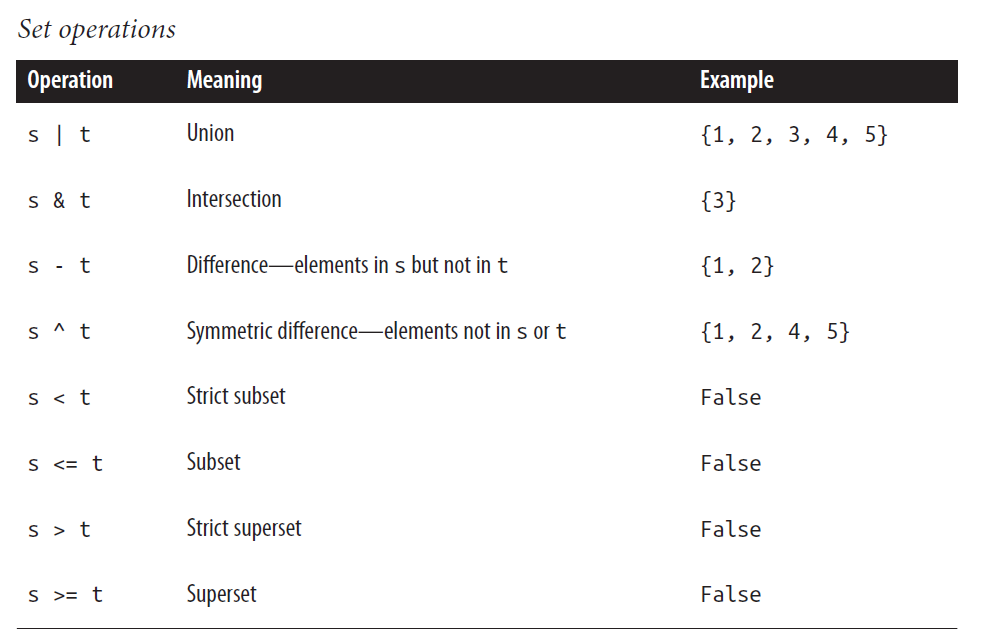

#### Dictionary: the most important data structure in Python. It is a mutable, unordered collection of unique key/value pairs

In [76]:
# A dictionary on one line that stores Grace Hopper's information

grace = {"first": "Grace", "last": "Hopper", "birthday": [9, 12, 1906]}


# You can split up dicts onto many lines
constants = {
'pi': 3.14159,
"e": 2.718,
"h": 6.62606957e-34,
True: 1.0,
}

# A dict being formed from a list of (key, value) tuples
axes = dict([(1, "x"), (2, "y"), (3, "z")])

In [69]:
constants['e']

2.718

In [70]:
axes[3]

'z'

In [71]:
grace['birthday']

[9, 12, 1906]

In [74]:
# They are mutable

constants[False] = 0.0
constants

{'pi': 3.14159, 'e': 2.718, 'h': 6.62606957e-34, True: 1.0, False: 0.0}

In [77]:
del axes[3]
axes

{1: 'x', 2: 'y'}

In [79]:
grace['first'] = "Grace, a pioneer of computer programming"
grace

{'first': 'Grace, a pioneer of computer programming',
 'last': 'Hopper',
 'birthday': [9, 12, 1906]}